<a href="https://colab.research.google.com/github/yuri-pin/classes_code/blob/main/metodo_numerico_ED_1%20/m%C3%A9todo_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para esse problema teremos que aplicar diferentes métodos de Euler para ver qual é uma melhor aproximação para a solução de
$$
\dot{x} = t(x-x^2)
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import prettytable

#para todos os métodos
N = 20
#condição inicial
#x[0] = 1/2

Agora vamos aplicar o método de Euler mais simples que é o explícito
$$
x(t+Δt) = x(t) + Δt\cdot f(x(t),t)
$$

In [ ]:
x_e = np.zeros(N + 1)
x_e[0] = 1/2
for j in range (1,N+1):
  x_e[j] = x_e[j-1] + (1/N)*((j-1)/N)*(x_e[j-1] - x_e[j-1]**2)
print(x_e)


[0.5        0.5        0.500625   0.501875   0.50374997 0.50624983
 0.50937434 0.51312302 0.51749501 0.52248889 0.52810251 0.53433277
 0.54117535 0.54862449 0.55667265 0.56531023 0.57452528 0.58430312
 0.59462607 0.60547314 0.61681972]


Agora vamos aplicar o método de Euler mais simples que é o implícito
$$
x(t+Δt) = x(t) + Δt\cdot f(x(t+Δt),t+Δt)
$$

In [ ]:
#vamos determinar as variaveis antes
d_t = 1/N

x_i = np.zeros(N+1)
x_i[0] = 1/2
for j in range (1,N+1):
  x_i[j] = ((d_t*(j*d_t + d_t) - 1) + ((d_t*(j*d_t + d_t) - 1)**2 + 4*(d_t*(j*d_t + d_t))*x_i[j-1])**(1/2))/(2*d_t*(j*d_t + d_t))

print(x_i)


[0.5        0.50124999 0.50312492 0.5056246  0.50874865 0.5124963
 0.51686633 0.52185677 0.5274648  0.53368643 0.54051629 0.54794732
 0.55597051 0.56457456 0.57374562 0.58346695 0.59371866 0.60447746
 0.61571643 0.62740483 0.63950805]


Agora vamos trabalhar com o método de Euler de segunda ordem
$$
x(t + Δt) = x(t) + Δt⋅f(x(t),t) + \frac{(Δt)^2}{2}\left( \frac{\partial f(x(t),t)}{\partial t} + \frac{\partial f(x(t),t)}{\partial x}\cdot f(x(t),t) \right)
$$
e como a função f que temos é dada por  $$f(x,t) = t(x - x^2)$$ teremos que as derivadas parciais são
$$\frac{\partial f(x(t),t)}{\partial x} = t(1-2x)$$ e $$\frac{\partial f(x(t),t)}{\partial t} = (x-x^2)$$

In [ ]:
x_1 = np.zeros(N+1)
x_1[0] = 1/2
for j in range (1,N+1):
  x_1[j] = x_1[j-1] + (1/N)*((j-1)/N)*(x_1[j-1] - x_1[j-1]**2) + (((1/N)**2)/2)*((x_1[j-1]-x_1[j-1]**2) + ((j-1)/N)*(1-2*x_1[j-1])*((x_1[j-1] - x_1[j-1]**2)))
print(x_e)

[0.5        0.5        0.500625   0.501875   0.50374997 0.50624983
 0.50937434 0.51312302 0.51749501 0.52248889 0.52810251 0.53433277
 0.54117535 0.54862449 0.55667265 0.56531023 0.57452528 0.58430312
 0.59462607 0.60547314 0.61681972]


Por fim vamos fazer o método numérico de Euler misto
$$
x(t+Δt) = x(t) + \frac{Δt}{2}\cdot [f(x(t+Δt),t+Δt) + f(x(t),t)]
$$


In [ ]:
#vamos determinar as variaveis antes
d_t = 1/N

x_m = np.zeros(N+1)
x_m[0] = 1/2
for j in range (1,N+1):
  x_m[j] = ((d_t*(j*d_t + d_t)/2 - 1) + ((d_t*(j*d_t + d_t)/2 - 1)**2 + 4*(d_t*(j*d_t + d_t)/2)*(x_m[j-1] + d_t*(j*d_t)*(x_m[j-1]-x_m[j-1]**2)/2))**(1/2))/(2*d_t*(j*d_t + d_t)/2)

print(x_m)

[0.5        0.5009375  0.50249997 0.50468734 0.50749938 0.51093563
 0.51499526 0.51967693 0.52497853 0.53089708 0.53742839 0.54456683
 0.55230508 0.56063379 0.56954127 0.57901324 0.58903243 0.59957838
 0.61062711 0.62215093 0.63411823]


In [ ]:
x = np.zeros(N+1)
for j in range (0,N+1):
  x[j] = np.exp((j/N)**2/2)/(1+np.exp((j/N)**2/2))
print(x)

[0.5        0.5003125  0.50125    0.50281247 0.50499983 0.50781186
 0.5112481  0.51530771 0.51998934 0.5252909  0.53120937 0.53774058
 0.54487889 0.55261697 0.56094545 0.56985265 0.57932425 0.58934299
 0.59988837 0.61093639 0.62245933]


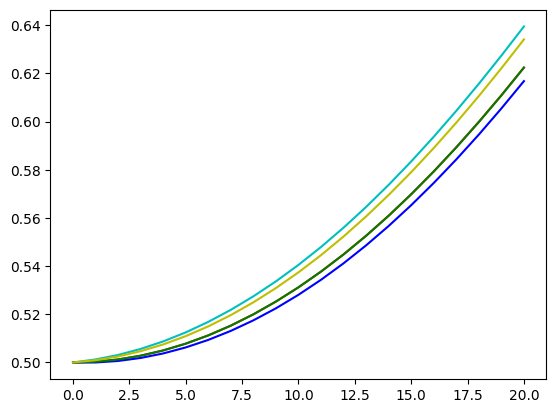

In [ ]:
plt.plot(x,'r')
plt.plot(x_e,'b')
plt.plot(x_i,'c')
plt.plot(x_1,'g')
plt.plot(x_m,'y')